In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset
orders = pd.read_csv('../PizzaPlaceSales/pizza_sales/order_summary.csv')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48592 entries, 0 to 48591
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48592 non-null  int64  
 1   order_details_id  48592 non-null  int64  
 2   o_date            48592 non-null  object 
 3   o_time            48592 non-null  object 
 4   pizza_id          48592 non-null  object 
 5   quantity          48592 non-null  int64  
 6   pizza_type_id     48592 non-null  object 
 7   size              48592 non-null  object 
 8   unit_price        48592 non-null  float64
 9   name              48592 non-null  object 
 10  category          48592 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.1+ MB


In [4]:
orders.describe()

,order_id,order_details_id,quantity,unit_price
count,48592.000000,48592.000000,48592.000000,48592.000000
mean,10701.841558,24311.322996,1.019633,16.482921
std,6180.167605,14035.645809,0.143117,3.592585
min,1.000000,1.000000,1.000000,9.750000
25%,5337.750000,12156.750000,1.000000,12.750000
50%,10685.000000,24313.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,25.500000


In [5]:
# Convert o_date and o_time to proper DateTime columns. Drop original

orders["date"] = pd.to_datetime(orders["o_date"])
orders['hour'] = pd.to_datetime(orders['o_time'], format='%H:%M:%S').dt.hour
orders.drop(columns=['o_date','o_time'],inplace=True)

In [6]:
orders.head()

,order_id,order_details_id,pizza_id,quantity,pizza_type_id,size,unit_price,name,category,date,hour
0,9,23,veggie_veg_s,1,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,2015-01-01,12
1,47,116,veggie_veg_s,1,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,2015-01-01,18
2,7,13,spinach_supr_s,1,spinach_supr,S,12.50,The Spinach Supreme Pizza,Supreme,2015-01-01,12
3,8,14,spinach_supr_s,1,spinach_supr,S,12.50,The Spinach Supreme Pizza,Supreme,2015-01-01,12
4,2,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,2015-01-01,11


In [7]:
# Calculate the total price for pizzas of same size and type within an order
orders['total_price']=orders["unit_price"].multiply(orders["quantity"], axis="index")

In [8]:
# Its better to go with daily sales data instead. Let's rename the columns to more valid names.
daily_sales = orders.groupby(['date']).aggregate({'order_id':'count', 'quantity':'sum', 'total_price':'sum'})
daily_sales.rename(columns={'order_id':'order_counts', 'quantity':'pizza_counts', 'total_price':'total_revenue'}, inplace=True)

In [9]:
daily_sales.head()

,order_counts,pizza_counts,total_revenue
date,,,
2015-01-01,161,162,2713.85
2015-01-02,160,165,2731.90
2015-01-03,154,158,2662.40
2015-01-04,106,106,1755.45
2015-01-05,121,125,2065.95


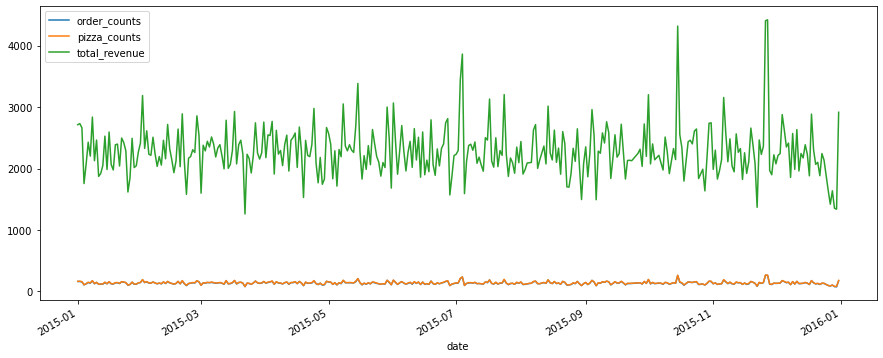

In [10]:
daily_sales.plot(figsize=(15,6));

In [11]:
(daily_sales['pizza_counts']-daily_sales['order_counts']).value_counts()

2    80
1    71
3    69
4    54
0    34
5    20
6    17
7     8
8     3
9     2
dtype: int64

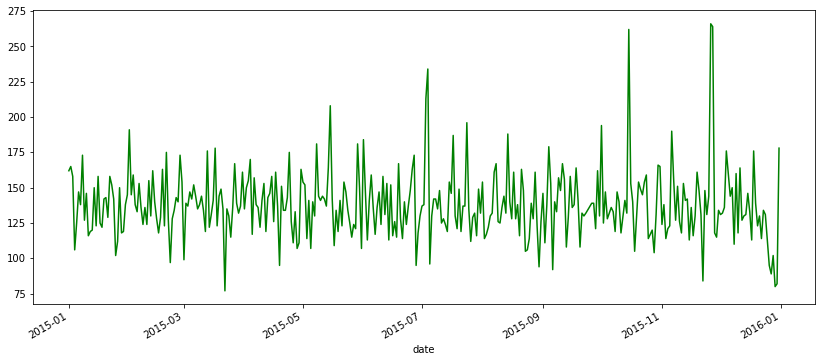

In [12]:
daily_sales['pizza_counts'].plot(figsize=(14,6), color='green');

In [13]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 2015-01-01 to 2015-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_counts   358 non-null    int64  
 1   pizza_counts   358 non-null    int64  
 2   total_revenue  358 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.2 KB


In [14]:
idx = pd.date_range(daily_sales.index.min(), daily_sales.index.max())
print('Shop is closed on: ',idx.difference(daily_sales.index))

Shop is closed on:  DatetimeIndex(['2015-09-24', '2015-09-25', '2015-10-05', '2015-10-12',
               '2015-10-19', '2015-10-26', '2015-12-25'],
              dtype='datetime64[ns]', freq=None)


In [15]:
# Create rows for days with no sales (pizza place closed) as 0
# daily_sales = daily_sales.reindex(idx, fill_value=0)

In [16]:
daily_sales.describe()

,order_counts,pizza_counts,total_revenue
count,358.000000,358.000000,358.000000
mean,135.731844,138.396648,2281.713547
std,24.070523,24.438666,406.137497
min,73.000000,77.000000,1259.250000
25%,122.000000,124.000000,2047.875000
50%,133.000000,136.000000,2244.725000
75%,146.000000,150.000000,2463.237500
max,261.000000,266.000000,4422.450000


In [17]:
daily_sales.shape

(358, 3)

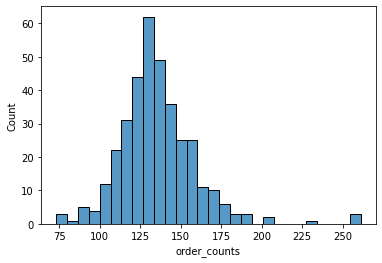

In [18]:
sns.histplot(data=daily_sales['order_counts']);

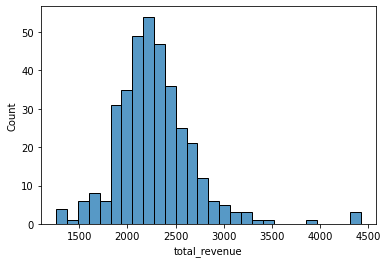

In [19]:
sns.histplot(data=daily_sales['total_revenue']);

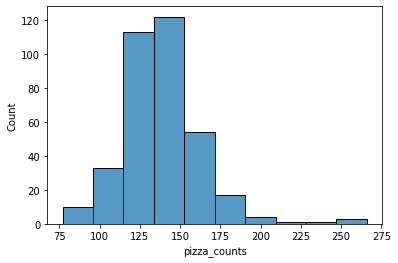

In [20]:
sns.histplot(data=daily_sales['pizza_counts'], bins=10);

In [21]:
x = daily_sales.reset_index()

In [22]:
x.rename(columns={'index':'date'}, inplace=True)

In [23]:
x['day'] = x.date.dt.day_name()
x['month'] = x.date.dt.month_name()

In [24]:
x.head()

,date,order_counts,pizza_counts,total_revenue,day,month
0,2015-01-01,161,162,2713.85,Thursday,January
1,2015-01-02,160,165,2731.90,Friday,January
2,2015-01-03,154,158,2662.40,Saturday,January
3,2015-01-04,106,106,1755.45,Sunday,January
4,2015-01-05,121,125,2065.95,Monday,January


In [25]:
x[['order_counts', 'pizza_counts', 'total_revenue']].mean()

order_counts      135.731844
pizza_counts      138.396648
total_revenue    2281.713547
dtype: float64

In [26]:
aggregates = x[['order_counts', 'pizza_counts', 'total_revenue', 'day', 'month']].groupby(['day','month']).agg(['min', 'max', 'mean', 'median'])

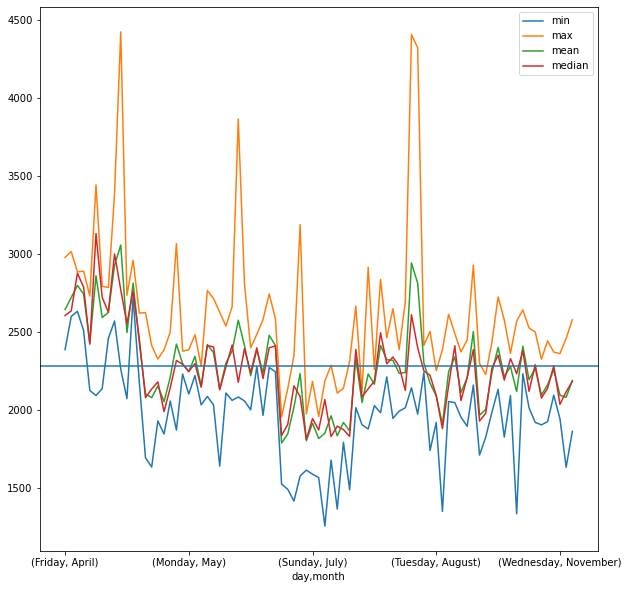

In [27]:
aggregates['total_revenue'].plot(figsize=(10,10))
plt.axhline(y=2281.7)

<AxesSubplot:xlabel='day,month'>

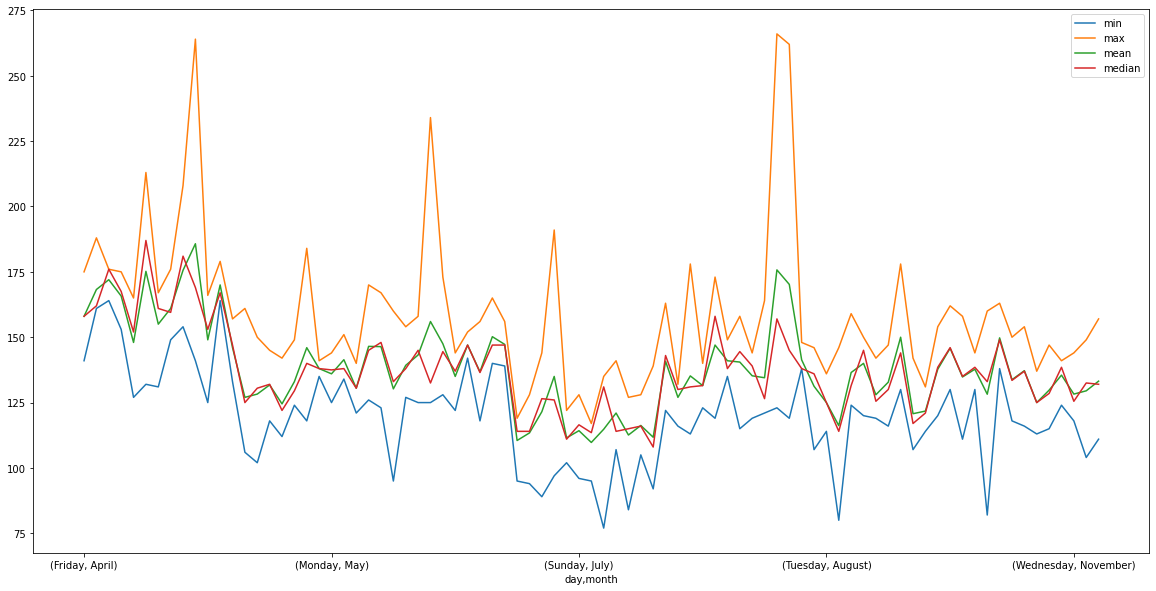

In [28]:
aggregates['pizza_counts'].plot(figsize=(20,10))

<AxesSubplot:xlabel='day,month'>

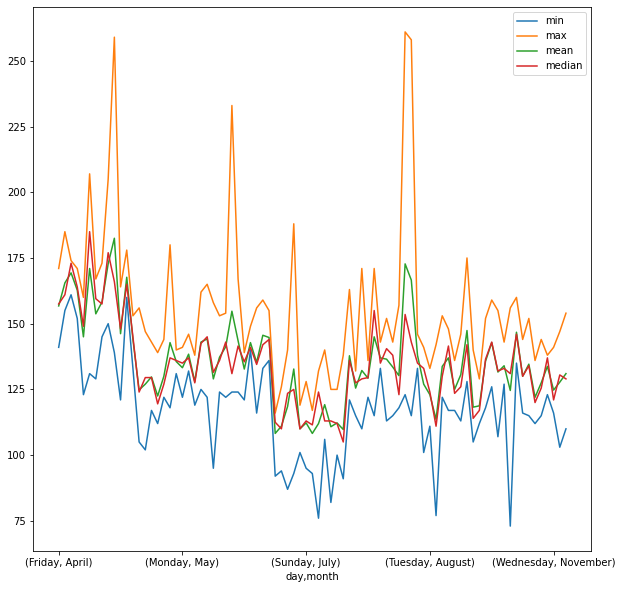

In [29]:
aggregates['order_counts'].plot(figsize=(10,10))

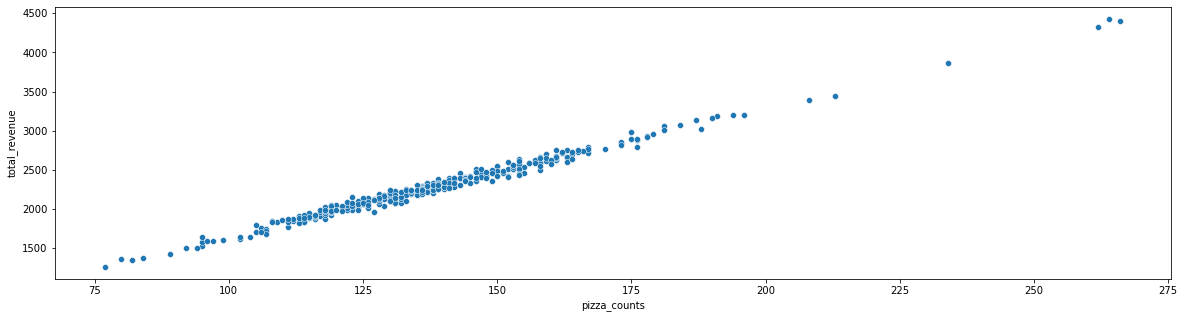

In [30]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=x, x='pizza_counts', y='total_revenue');

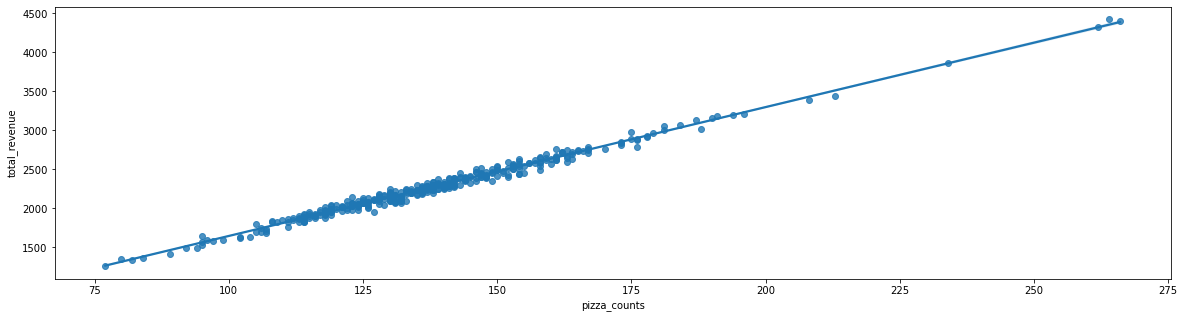

In [31]:
plt.figure(figsize=(20,5))
g = sns.regplot(data=x, x='pizza_counts', y='total_revenue');

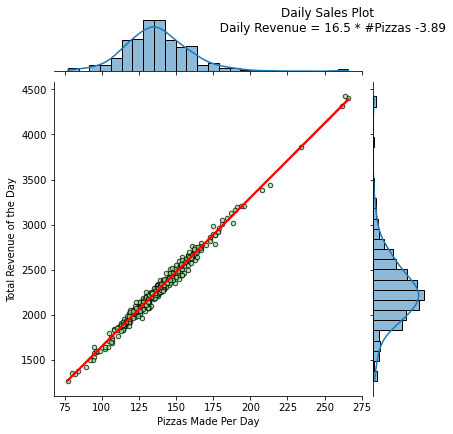

In [32]:
g = sns.jointplot(data=x, x='pizza_counts', y='total_revenue', kind='reg',
                  joint_kws= {'line_kws': {'color':'red'}, 'color':'lightgreen'},
                  scatter_kws= {'s':20, 'alpha':0.75, 'edgecolor':'black'})
g.ax_joint.set_xlabel('Pizzas Made Per Day')
g.ax_joint.set_ylabel('Total Revenue of the Day')
g.fig.suptitle('Daily Sales Plot \n  Daily Revenue = 16.5 * #Pizzas -3.89', x=0.75,y=1);

In [33]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x=x['pizza_counts'], y=x['total_revenue'])
print(slope, intercept)

16.514910455294665 -3.894702284998857


In [117]:
print(std_err)

0.09825831001575527


In [34]:
weekly_sales = daily_sales

In [35]:
weekly_sales['week'] = weekly_sales.index.isocalendar().week

In [36]:
weekly_sales.reset_index(inplace=True)

In [37]:
weekly_sales = weekly_sales[['order_counts', 'pizza_counts','total_revenue','week']].groupby('week').agg('sum')

In [38]:
weekly_sales

,order_counts,pizza_counts,total_revenue
week,,,
1,581,591,9863.60
2,951,972,15999.05
3,898,917,15115.95
4,952,968,15652.80
5,960,973,16279.20
6,972,988,16175.70
7,959,975,16049.60
8,913,932,15309.95
9,956,971,15925.85


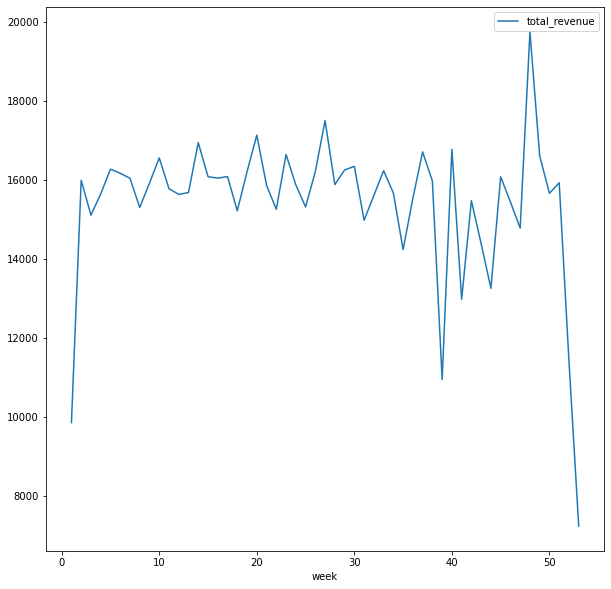

In [39]:
weekly_sales.plot(y='total_revenue', figsize=(10,10));

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
# Reference https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/
# Null hypothesis is Data is non-stationary.
def run_adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis. We cannot reject the null hypothesis. Data is non-stationary ")

In [42]:
run_adfuller_test(weekly_sales['total_revenue'])

ADF Test Statistic : -4.8896228788490115
p-value : 3.653317301282414e-05
#Lags Used : 0
Number of Observations : 52
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [43]:
run_adfuller_test(weekly_sales['pizza_counts'])

ADF Test Statistic : -4.787385196171703
p-value : 5.748985242458673e-05
#Lags Used : 0
Number of Observations : 52
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [44]:
run_adfuller_test(daily_sales['total_revenue'])

ADF Test Statistic : -4.244791404779736
p-value : 0.0005528476190527079
#Lags Used : 17
Number of Observations : 340
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


In [45]:
run_adfuller_test(daily_sales['pizza_counts'])

ADF Test Statistic : -5.236517314945135
p-value : 7.4018153203449776e-06
#Lags Used : 15
Number of Observations : 342
Strong evidence against the null hypothesis(Ho). We reject the null hypothesis. Data is stationary


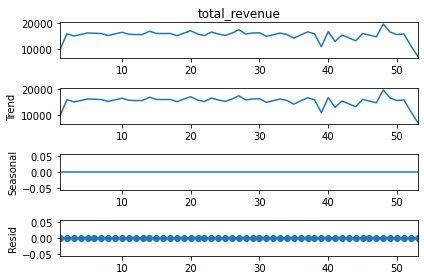

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(weekly_sales['total_revenue'], period=1)
decomp.plot()
plt.rcParams.update({'figure.figsize': (10,5)})
plt.show()

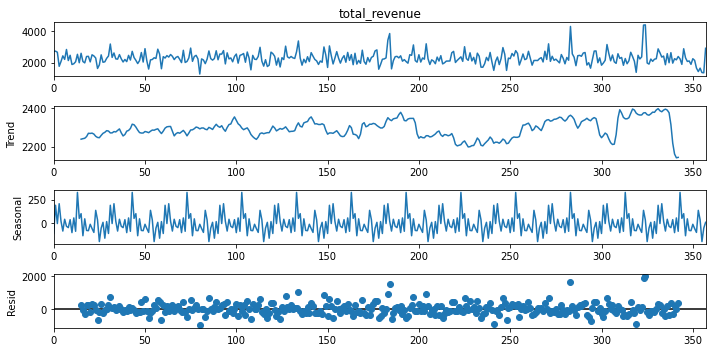

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(daily_sales['total_revenue'], period=30)
decomp.plot()
plt.rcParams.update({'figure.figsize': (10,5)})
plt.show()

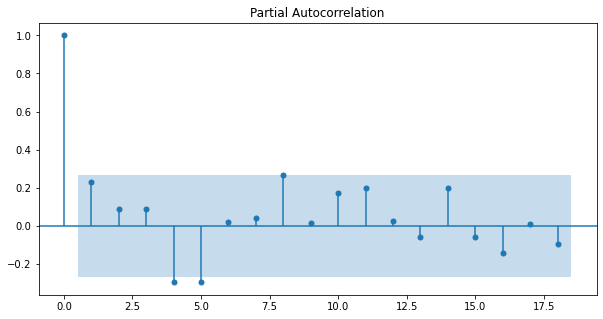

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf =  plot_pacf(weekly_sales['total_revenue'].values.squeeze(), method='ols')

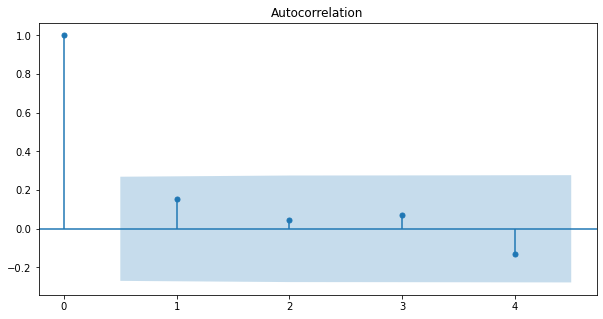

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
acf =  plot_acf(weekly_sales['total_revenue'].values.squeeze(), lags=4)

In [50]:
daily_sales.rename(columns={'index':'date'}, inplace=True)

In [51]:
df = daily_sales.drop(columns=['week'])

In [52]:
df.head()

,date,order_counts,pizza_counts,total_revenue
0,2015-01-01,161,162,2713.85
1,2015-01-02,160,165,2731.90
2,2015-01-03,154,158,2662.40
3,2015-01-04,106,106,1755.45
4,2015-01-05,121,125,2065.95


In [53]:
downsample = df[['date',
                 'order_counts', 
                 'pizza_counts',
                 'total_revenue', 
                 ]].resample('7D', on='date').sum().reset_index(drop=False)

df = downsample.copy()

In [54]:
df.head()

,date,order_counts,pizza_counts,total_revenue
0,2015-01-01,979,1001,16560.70
1,2015-01-08,932,951,15798.00
2,2015-01-15,924,942,15445.50
3,2015-01-22,923,934,15183.75
4,2015-01-29,1015,1035,17099.95


In [55]:
df.tail()

,date,order_counts,pizza_counts,total_revenue
48,2015-12-03,1016,1036,16942.35
49,2015-12-10,936,949,15619.75
50,2015-12-17,912,929,15368.15
51,2015-12-24,563,579,9528.15
52,2015-12-31,171,178,2916.00


The 53rd (52nd row index) week only has a day's sales and it wont be right to include it in the data for training the model.

In [56]:
#df = df[:-1]

In [57]:
df = df[:-2]

In [58]:
df.tail()

,date,order_counts,pizza_counts,total_revenue
46,2015-11-19,930,947,15558.15
47,2015-11-26,1139,1160,19209.50
48,2015-12-03,1016,1036,16942.35
49,2015-12-10,936,949,15619.75
50,2015-12-17,912,929,15368.15


In [59]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 0, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -431.152
Date:                Wed, 11 Jan 2023   AIC                            874.305
Time:                        21:46:52   BIC                            885.896
Sample:                             0   HQIC                           878.734
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.577e+04    243.189     64.861      0.000    1.53e+04    1.63e+04
ar.L1         -0.7725      0.306     -2.529      0.011      -1.371      -0.174
ma.L1          1.0221      0.350      2.924      0.003       0.337       1.707
ma.L2          0.2334      0.285      0.820      0.412      -0.325       0.792
ma.L3         -0.0853      0.192     -0.445      0.656      -0.461       0.290
sigma2      1.283e+06   1.96e+05      6.537      0.000    8.99e+05    1.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.02   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


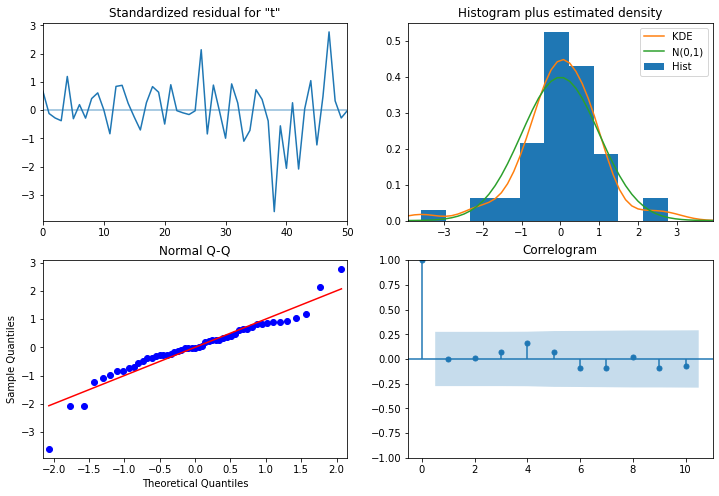

In [60]:
a = arima_fit.plot_diagnostics(figsize=(12,8))
plt.show()

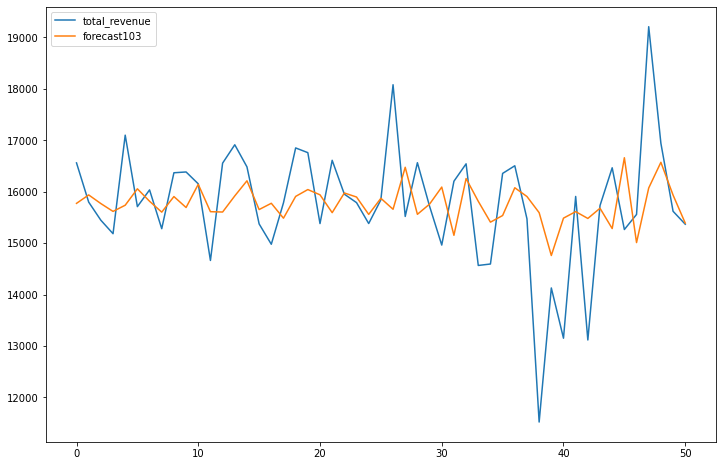

In [61]:
df['forecast103']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast103']].plot(figsize=(12,8));

In [62]:
# q = 3, p = 2, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(2, 0, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -430.168
Date:                Wed, 11 Jan 2023   AIC                            874.336
Time:                        21:46:53   BIC                            887.858
Sample:                             0   HQIC                           879.503
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.577e+04    269.617     58.506      0.000    1.52e+04    1.63e+04
ar.L1         -1.7373      0.284     -6.122      0.000      -2.293      -1.181
ar.L2         -0.8440      0.244     -3.459      0.001      -1.322      -0.366
ma.L1          2.0894      0.456      4.578      0.000       1.195       2.984
ma.L2          1.4843      0.683      2.173      0.030       0.146       2.823
ma.L3          0.2729      0.325      0.840      0.401      -0.364       0.910
sigma2      1.183e+06      0.019   6.36e+07      0.000    1.18e+06    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 8.26
Prob(Q):                              0.85   Prob(JB):                         0.02
Heteroskedasticity (H):               5.78   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.77e+25. Standard errors may be unstable.
"""

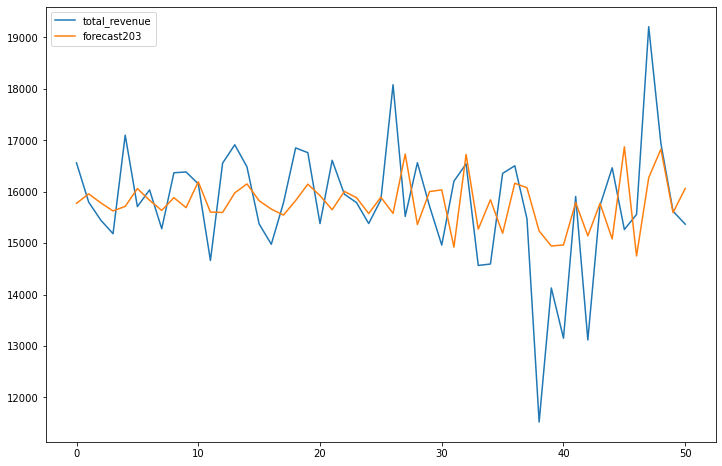

In [63]:
df['forecast203']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast203']].plot(figsize=(12,8));

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


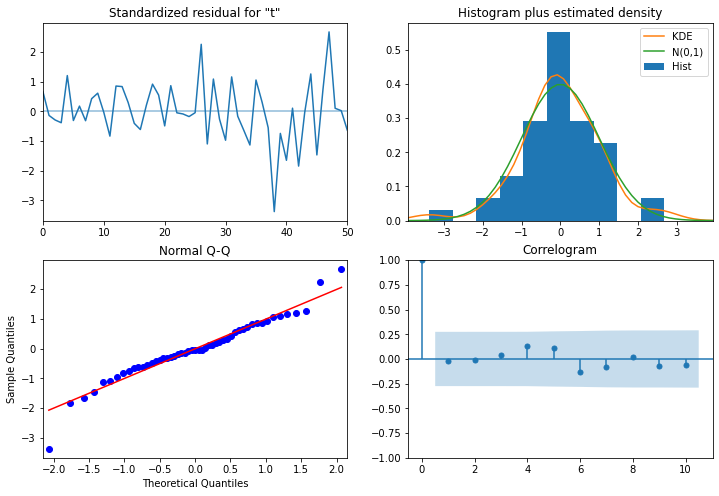

In [64]:

a = arima_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [65]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(2, 0, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -431.937
Date:                Wed, 11 Jan 2023   AIC                            873.875
Time:                        21:46:54   BIC                            883.534
Sample:                             0   HQIC                           877.566
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.577e+04    309.960     50.886      0.000    1.52e+04    1.64e+04
ar.L1         -0.6059      0.506     -1.197      0.231      -1.598       0.386
ar.L2          0.2403      0.218      1.100      0.271      -0.188       0.668
ma.L1          0.8047      0.549      1.464      0.143      -0.272       1.882
sigma2      1.442e+06   2.21e+05      6.535      0.000    1.01e+06    1.87e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                23.63
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               5.43   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

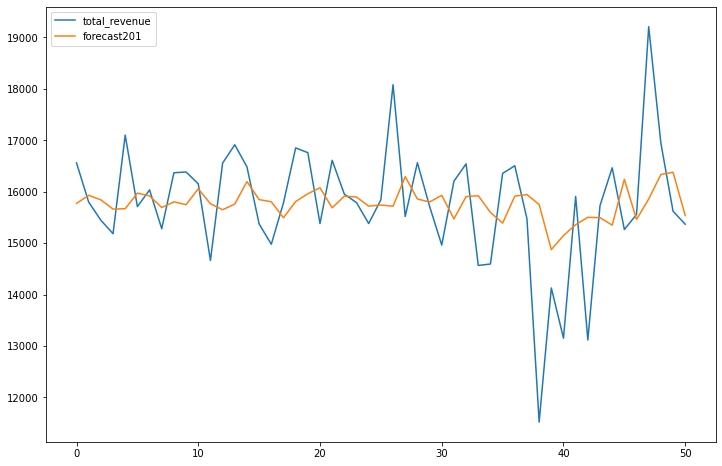

In [66]:
df['forecast201']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast201']].plot(figsize=(12,8));

In [67]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201
0,2015-01-01,979,1001,16560.70,15773.580513,15774.198526,15772.732064
1,2015-01-08,932,951,15798.00,15937.711878,15958.284743,15930.570258
2,2015-01-15,924,942,15445.50,15769.422571,15782.228277,15842.029812
3,2015-01-22,923,934,15183.75,15617.137988,15626.304533,15661.777355
4,2015-01-29,1015,1035,17099.95,15737.570909,15714.667543,15669.263363


In [68]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(2, 1, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -432.537
Date:                Wed, 11 Jan 2023   AIC                            873.074
Time:                        21:46:54   BIC                            880.722
Sample:                             0   HQIC                           875.986
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1347      0.247      0.545      0.586      -0.350       0.619
ar.L2         -0.0692      0.117     -0.589      0.556      -0.299       0.161
ma.L1         -0.5202      0.247     -2.109      0.035      -1.004      -0.037
sigma2      1.446e+06   1.92e+05      7.524      0.000    1.07e+06    1.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.22   Prob(JB):                         0.38
Heteroskedasticity (H):               2.77   Skew:                            -0.08
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

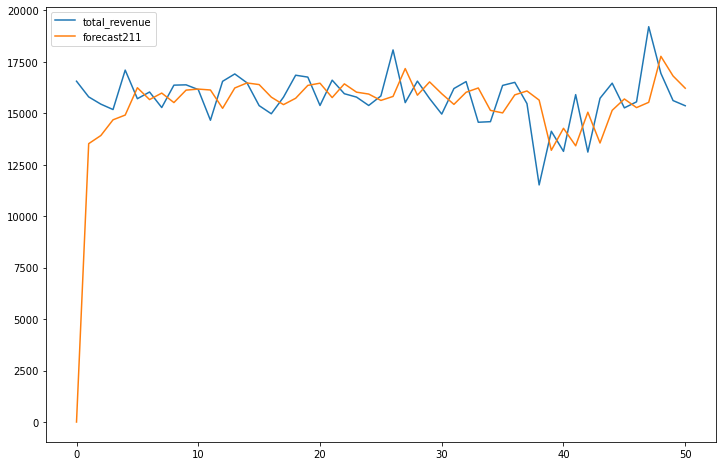

In [69]:
df['forecast211']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast211']].plot(figsize=(12,8));

In [70]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 1, 3))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -430.664
Date:                Wed, 11 Jan 2023   AIC                            871.329
Time:                        21:46:54   BIC                            880.889
Sample:                             0   HQIC                           874.970
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8126      0.241     -3.375      0.001      -1.284      -0.341
ma.L1          0.5308      0.244      2.177      0.029       0.053       1.009
ma.L2         -0.3555      0.195     -1.821      0.069      -0.738       0.027
ma.L3         -0.2125      0.125     -1.696      0.090      -0.458       0.033
sigma2      1.889e+06   3.84e+05      4.919      0.000    1.14e+06    2.64e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.17   Prob(JB):                         0.47
Heteroskedasticity (H):               3.54   Skew:                            -0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

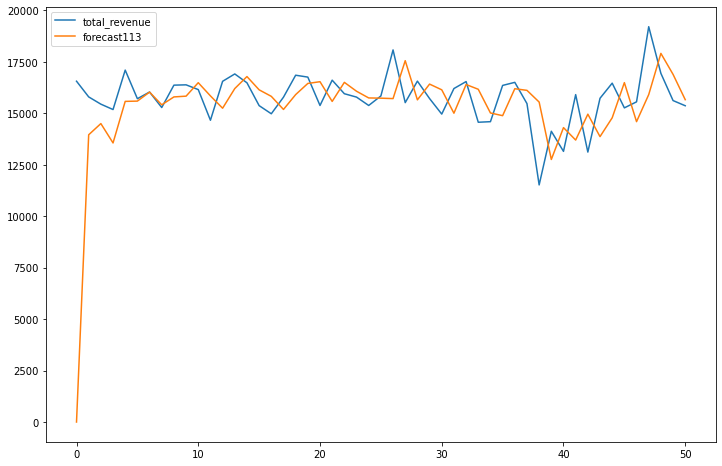

In [71]:
df['forecast113']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast113']].plot(figsize=(12,8));

In [72]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113
0,2015-01-01,979,1001,16560.70,15773.580513,15774.198526,15772.732064,0.000000,0.000000
1,2015-01-08,932,951,15798.00,15937.711878,15958.284743,15930.570258,13525.863206,13957.240028
2,2015-01-15,924,942,15445.50,15769.422571,15782.228277,15842.029812,13921.589509,14501.445611
3,2015-01-22,923,934,15183.75,15617.137988,15626.304533,15661.777355,14684.920246,13560.509314
4,2015-01-29,1015,1035,17099.95,15737.570909,15714.667543,15669.263363,14915.729605,15580.297489


In [73]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 0, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -432.358
Date:                Wed, 11 Jan 2023   AIC                            872.716
Time:                        21:46:55   BIC                            880.443
Sample:                             0   HQIC                           875.668
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.577e+04    243.405     64.800      0.000    1.53e+04    1.62e+04
ar.L1          0.2684      0.556      0.483      0.629      -0.821       1.358
ma.L1         -0.0692      0.606     -0.114      0.909      -1.257       1.118
sigma2      1.442e+06   1.96e+05      7.372      0.000    1.06e+06    1.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.47
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

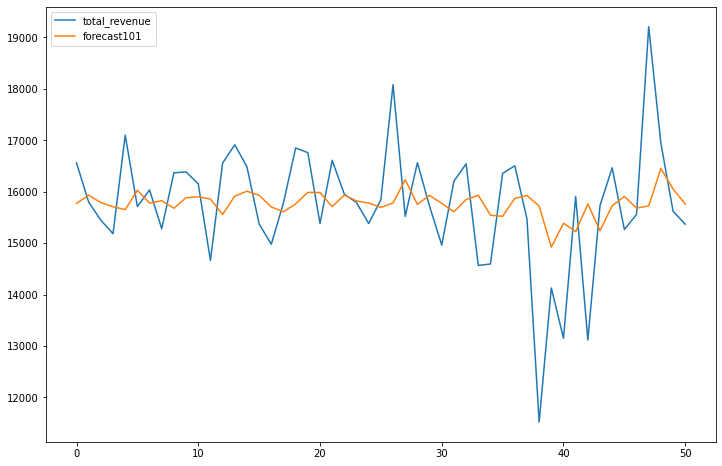

In [74]:
df['forecast101']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast101']].plot(figsize=(12,8));

In [75]:
# q = 3, p = 1, d=0
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA - set p = 1, d = 0 and set q = 3 (from PACF plot)
arimaModel = ARIMA(df['total_revenue'], order=(1, 1, 1))
arima_fit=arimaModel.fit()
arima_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_revenue   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -432.448
Date:                Wed, 11 Jan 2023   AIC                            870.897
Time:                        21:46:55   BIC                            876.633
Sample:                             0   HQIC                           873.081
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2524      0.173      1.462      0.144      -0.086       0.591
ma.L1         -0.6303      0.179     -3.515      0.000      -0.982      -0.279
sigma2      1.535e+06   2.11e+05      7.286      0.000    1.12e+06    1.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):                 2.16
Prob(Q):                              0.23   Prob(JB):                         0.34
Heteroskedasticity (H):               2.74   Skew:                            -0.09
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

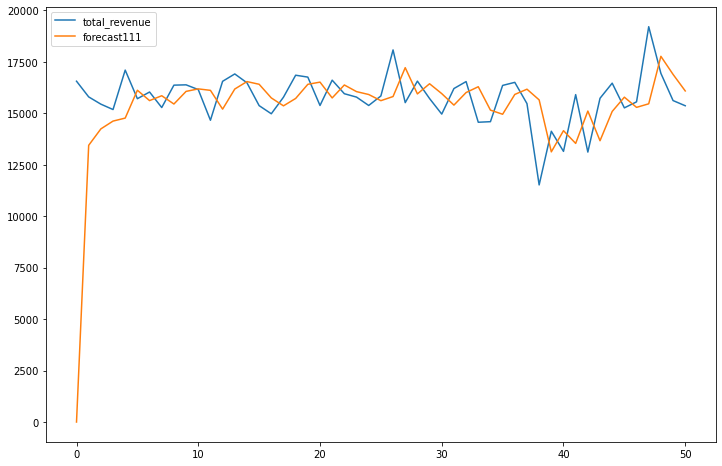

In [76]:
df['forecast111']=arima_fit.predict(start=0,end=54)
df[['total_revenue','forecast111']].plot(figsize=(12,8));

In [77]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113,forecast101,forecast111
0,2015-01-01,979,1001,16560.70,15773.580513,15774.198526,15772.732064,0.000000,0.000000,15772.731502,0.000000
1,2015-01-08,932,951,15798.00,15937.711878,15958.284743,15930.570258,13525.863206,13957.240028,15931.907513,13445.226671
2,2015-01-15,924,942,15445.50,15769.422571,15782.228277,15842.029812,13921.589509,14501.445611,15788.781946,14243.403221
3,2015-01-22,923,934,15183.75,15617.137988,15626.304533,15661.777355,14684.920246,13560.509314,15708.667928,14622.642017
4,2015-01-29,1015,1035,17099.95,15737.570909,15714.667543,15669.263363,14915.729605,15580.297489,15650.989015,14768.392211


In [78]:
df_1 = df.copy()

In [79]:
df['forecast103'] -= df['total_revenue']
df['forecast203'] -= df['total_revenue']
df['forecast201'] -= df['total_revenue']
df['forecast211'] -= df['total_revenue']
df['forecast113'] -= df['total_revenue']
df['forecast101'] -= df['total_revenue']
df['forecast111'] -= df['total_revenue']

In [80]:
square_errors = df[['forecast103','forecast203','forecast201','forecast211','forecast113','forecast101','forecast111']].apply(lambda x : x*x)

In [81]:
np.sqrt(square_errors.sum())

forecast103     8096.868208
forecast203     7887.790091
forecast201     8215.832618
forecast211    19160.086752
forecast113    19048.224977
forecast101     8293.730470
forecast111    19180.756572
dtype: float64

In [82]:
# The lowest error in ARIMA model is of parameters - 2,0,3  p = 2, d=0, q=3

In [83]:
df = df_1

In [84]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [85]:
print(r2_score(df['total_revenue'],df['forecast103']))
print(r2_score(df['total_revenue'],df['forecast203']))
print(r2_score(df['total_revenue'],df['forecast201']))
print(r2_score(df['total_revenue'],df['forecast211']))
print(r2_score(df['total_revenue'],df['forecast113']))
print(r2_score(df['total_revenue'],df['forecast101']))
print(r2_score(df['total_revenue'],df['forecast111']))

0.08687138202658584
0.13342031713628755
0.05984171236798108
-4.1131997092487085
-4.053669505272547
0.04192910198390454
-4.12423785613324


In [86]:
print(MSE(df['total_revenue'],df['forecast103']))
print(MSE(df['total_revenue'],df['forecast203']))
print(MSE(df['total_revenue'],df['forecast201']))
print(MSE(df['total_revenue'],df['forecast211']))
print(MSE(df['total_revenue'],df['forecast113']))
print(MSE(df['total_revenue'],df['forecast101']))
print(MSE(df['total_revenue'],df['forecast111']))

1285475.9761011493
1219945.7357617153
1323527.5608441632
7198214.203202167
7114409.309173552
1348744.4140505542
7213753.386140308


In [87]:
df.describe()

,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113,forecast101,forecast111
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,938.392157,956.647059,15772.731373,15771.162201,15777.481616,15773.041091,15325.478324,15317.496327,15774.492230,15317.654050
std,70.604271,72.280239,1198.301468,354.948824,467.656049,285.768094,2376.664765,2398.658442,242.408772,2374.679759
min,682.000000,691.000000,11521.000000,14759.481410,14749.754609,14873.479700,0.000000,0.000000,14922.500421,0.000000
25%,912.500000,930.000000,15370.975000,15592.669582,15586.728317,15655.380759,15194.709256,15011.297995,15699.716934,15179.088478
50%,938.000000,960.000000,15788.000000,15769.422571,15789.835868,15800.034024,15786.136587,15747.394512,15778.003642,15784.648010
75%,976.000000,991.500000,16493.975000,15938.758715,16020.987934,15920.610296,16198.623176,16181.529080,15919.560406,16146.730281
max,1139.000000,1160.000000,19209.500000,16661.025985,16874.582694,16378.202459,17769.418690,17912.383552,16453.833837,17769.671941


In [88]:
df['average']=15652.643269

In [89]:
df.head()

,date,order_counts,pizza_counts,total_revenue,forecast103,forecast203,forecast201,forecast211,forecast113,forecast101,forecast111,average
0,2015-01-01,979,1001,16560.70,15773.580513,15774.198526,15772.732064,0.000000,0.000000,15772.731502,0.000000,15652.643269
1,2015-01-08,932,951,15798.00,15937.711878,15958.284743,15930.570258,13525.863206,13957.240028,15931.907513,13445.226671,15652.643269
2,2015-01-15,924,942,15445.50,15769.422571,15782.228277,15842.029812,13921.589509,14501.445611,15788.781946,14243.403221,15652.643269
3,2015-01-22,923,934,15183.75,15617.137988,15626.304533,15661.777355,14684.920246,13560.509314,15708.667928,14622.642017,15652.643269
4,2015-01-29,1015,1035,17099.95,15737.570909,15714.667543,15669.263363,14915.729605,15580.297489,15650.989015,14768.392211,15652.643269


In [90]:
print(MSE(df['total_revenue'],df['average']))

1422192.1399630965


In [91]:
print(r2_score(df['total_revenue'],df['average']))

-0.010243962081613711


In [92]:
df.columns

Index(['date', 'order_counts', 'pizza_counts', 'total_revenue', 'forecast103',
       'forecast203', 'forecast201', 'forecast211', 'forecast113',
       'forecast101', 'forecast111', 'average'],
      dtype='object')

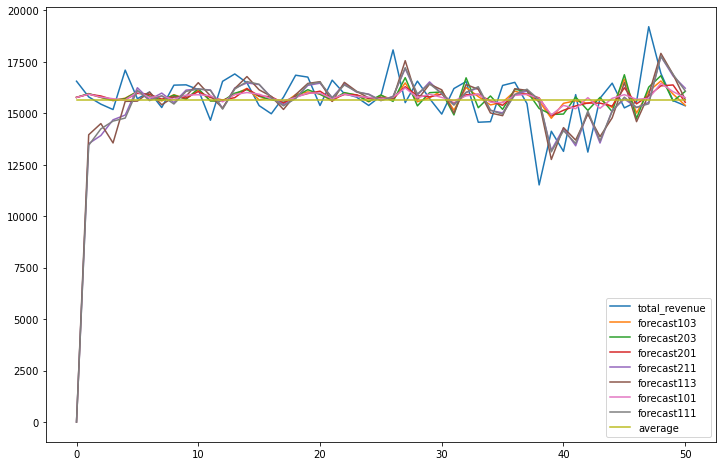

In [93]:
df[['total_revenue', 'forecast103',
       'forecast203', 'forecast201', 'forecast211', 'forecast113',
       'forecast101', 'forecast111', 'average']].plot(figsize=(12,8));

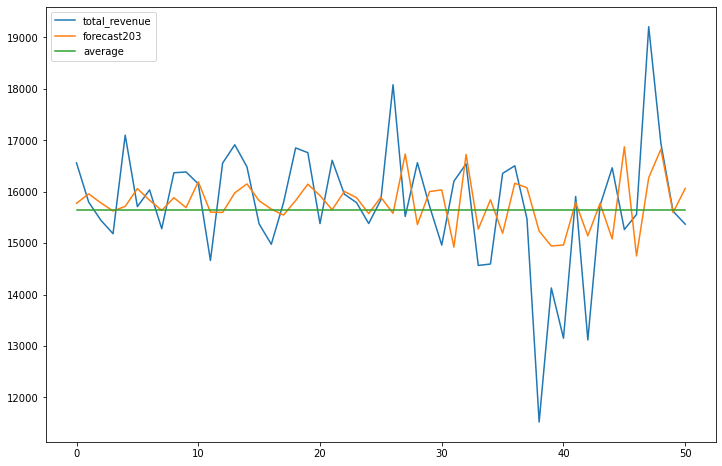

In [94]:
df[['total_revenue', 
       'forecast203','average']].plot(figsize=(12,8));

In [95]:
from sklearn.metrics import mean_absolute_error as MAE

In [96]:
df = daily_sales.drop(columns=['week'])
downsample = df[['date',
                 'order_counts', 
                 'pizza_counts',
                 'total_revenue', 
                 ]].resample('7D', on='date').sum().reset_index(drop=False)
df = downsample.copy()

In [97]:
df = df[:-1]
train = df[:-25]
test= df[-25:]

In [98]:
train.shape

(27, 4)

In [99]:
test.shape

(25, 4)

In [100]:
# 
# Fit model
model = ARIMA(train['total_revenue'], order=(2,0,3))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(25)
y_pred
# Calcuate metrics
score_mae = MAE(test['total_revenue'], y_pred)
score_rmse = np.sqrt(MSE(test['total_revenue'], y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 1965.1555425543415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


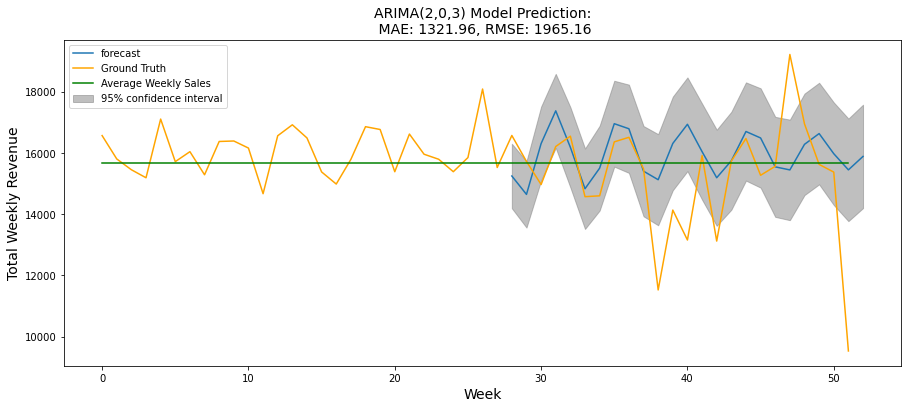

In [101]:
from statsmodels.graphics.tsaplots import plot_predict
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

plot_predict(model_fit,28,52, ax=ax)
sns.lineplot(x=df.index, y=df['total_revenue'], ax=ax, color='orange', label='Ground Truth') #navajowhite
sns.lineplot(x=df.index, y=df['total_revenue'].mean(), ax=ax, color='green', label='Average Weekly Sales')
ax.set_title('ARIMA(2,0,3) Model Prediction:' + f'\n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Week', fontsize=14)
ax.set_ylabel(ylabel='Total Weekly Revenue', fontsize=14)
plt.show()

In [102]:
daily_sales

,date,order_counts,pizza_counts,total_revenue,week
0,2015-01-01,161,162,2713.85,1
1,2015-01-02,160,165,2731.90,1
2,2015-01-03,154,158,2662.40,1
3,2015-01-04,106,106,1755.45,1
4,2015-01-05,121,125,2065.95,2
...,...,...,...,...,...
353,2015-12-27,87,89,1419.00,52
354,2015-12-28,102,102,1637.20,53
355,2015-12-29,77,80,1353.25,53
356,2015-12-30,73,82,1337.80,53


In [103]:
daily_sales['day'] = daily_sales.date.dt.day_name()

In [104]:
daily_sales

,date,order_counts,pizza_counts,total_revenue,week,day
0,2015-01-01,161,162,2713.85,1,Thursday
1,2015-01-02,160,165,2731.90,1,Friday
2,2015-01-03,154,158,2662.40,1,Saturday
3,2015-01-04,106,106,1755.45,1,Sunday
4,2015-01-05,121,125,2065.95,2,Monday
...,...,...,...,...,...,...
353,2015-12-27,87,89,1419.00,52,Sunday
354,2015-12-28,102,102,1637.20,53,Monday
355,2015-12-29,77,80,1353.25,53,Tuesday
356,2015-12-30,73,82,1337.80,53,Wednesday


In [105]:
weeklyrevenue = daily_sales[['total_revenue','week']].groupby('week').sum()

In [106]:
weeklyrevenue.reset_index(inplace=True)

In [107]:
weeklyrevenue.rename(columns={'total_revenue': 'weekly_revenue'}, inplace=True)

In [108]:
new_df = pd.merge(daily_sales, weeklyrevenue, on='week', how='outer')

In [109]:
new_df.head()

,date,order_counts,pizza_counts,total_revenue,week,day,weekly_revenue
0,2015-01-01,161,162,2713.85,1,Thursday,9863.60
1,2015-01-02,160,165,2731.90,1,Friday,9863.60
2,2015-01-03,154,158,2662.40,1,Saturday,9863.60
3,2015-01-04,106,106,1755.45,1,Sunday,9863.60
4,2015-01-05,121,125,2065.95,2,Monday,15999.05


In [110]:
new_df['percent'] = (new_df['total_revenue']/new_df['weekly_revenue'])*100

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


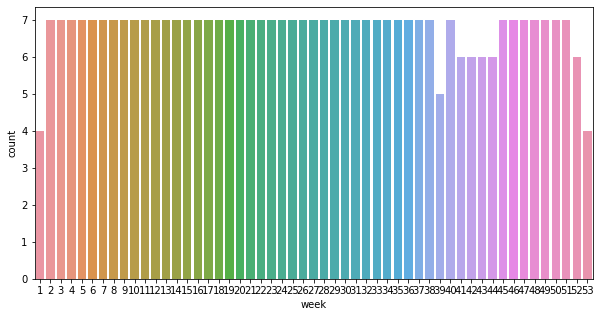

In [111]:
sns.countplot(new_df['week']);

1, 39, 41, 42, 43, 44, 53 are the weeks without 7 business days. Let's remove these rows

In [112]:
drop_rows = new_df[(new_df['week'] == 1) | (new_df['week'] == 39) | (new_df['week'] == 41) | (new_df['week'] == 42) 
      | (new_df['week'] == 43) | (new_df['week'] == 44) | (new_df['week'] == 53)].index

In [113]:
new_df = new_df.drop(drop_rows)

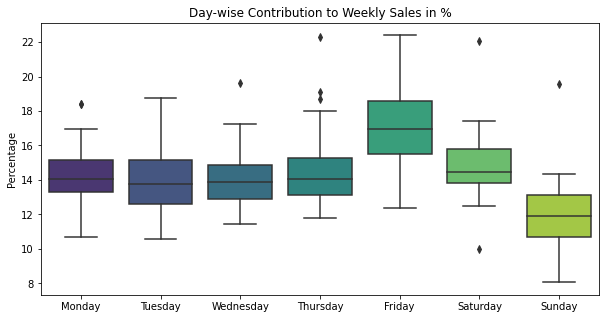

In [114]:
sns.boxplot(y='percent',x='day', data=new_df, palette='viridis' )
plt.xlabel(None)
plt.ylabel('Percentage')
plt.title('Day-wise Contribution to Weekly Sales in %');

In [115]:
new_df[['percent','day']].groupby('day').median()

,percent
day,
Friday,16.929974
Monday,14.024726
Saturday,14.454921
Sunday,11.913494
Thursday,14.075808
Tuesday,13.766431
Wednesday,13.878683


In [116]:
np.round(new_df[['percent','day']].groupby('day').mean())

,percent
day,
Friday,17.0
Monday,14.0
Saturday,15.0
Sunday,12.0
Thursday,15.0
Tuesday,14.0
Wednesday,14.0
